**Условие задачи**   
Описание данных  

Таблица products:  
*product_id - id товара*  
*level1 - категория*  
*level2 - подкатегория*  
*name - наименование товара*

Таблица orders:  
*order_id - номер чека*  
*accepted_at - дата и время чека*  
*product_id - id товара*  
*quantity - кол-во товара в чеке*  
*regular_price - регулярная цена*  
*price - текущая цена*  
*cost_price - закупочная цена*  

**Задания**  
1.Самая ходовая товарная группа  
По какой категории товаров продано больше всего позиций?
Подкрепите свой ответ таблицей, в которой рассчитано количество проданных штук товара в каждой товарной категории.
Дополнительно постройте на основании этой таблицы barchart.
Проверьте, чтобы все подписи на вашем графике выглядели читаемо и понятно. Этот график должен быть сходу понятен стороннему наблюдателю.  

2.Распределение продаж по подкатегориям  
Оцените распределение количества проданных позиций в каждой товарной категории (level1) по подкатегориям (level2). Проиллюстрируйте свой результат расчетной таблицей.

3.Найти средний чек в заданную дату  
Какой средний чек был 13.01.2022?

4.Доля промо в заданной категории  
Когда товар продается по промо-акции, его базовая цена не совпадает с фактической ценой. Вам необходимо посчитать, какую долю от общих продаж категории Сыры занимают промо (в штуках), построить пайчарт, который это проиллюстрирует. На графике должны быть видны группы, соответствующие доли и понятные подписи к ним.  

5.Посчитать маржу по категориям  
Нужно посчитать маржу в рублях и в %. Сделать это нужно по всем категориям level1 и отобразить с помощью 2 барчартов. Все подписи должны быть читаемыми и понятными.

6.ABC анализ  
Сделайте ABC-анализ продаж по количеству.  
Сделайте ABC-анализ по сумме продаж.  
Сделайте новый столбец, в котором будет итоговая группа на основании двух анализов. Например: AC.

**Решение**  
В условии задачи нет информации о ключах таблиц orders и products. Исходя из описания таблиц, поле product_id является первичным ключом в таблице products и внешним ключом для таблицы orders. В таблице orders первичный ключ, скорее всего, составной и состоит из полей order_id и product_id. Также нам неизвестно, есть ли дубликаты в таблицах.  
Для решения задачи будем использовать Python, бибилиотеки Pandas и Matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
orders = pd.read_excel('orders.xlsx')
products = pd.read_excel('products.xlsx')

In [2]:
# посмотрим на загруженныей датафрейм orders
orders.head()

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130


In [3]:
orders.info() # пустых значений в наборе данных нет, в наборе 3323 строки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3323 non-null   int64         
 1   accepted_at    3323 non-null   datetime64[ns]
 2   product_id     3323 non-null   int64         
 3   quantity       3323 non-null   int64         
 4   regular_price  3323 non-null   int64         
 5   price          3323 non-null   int64         
 6   cost_price     3323 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 181.9 KB


In [4]:
orders.duplicated() # дублирующихся строк в наборе данных нет

0       False
1       False
2       False
3       False
4       False
        ...  
3318    False
3319    False
3320    False
3321    False
3322    False
Length: 3323, dtype: bool

In [5]:
# посмотрим на загруженныей датафрейм products
products.head()

,product_id,level1,level2,name
0,1,Гигиена,Бритье,Кассеты для бритья Gillette Fusion ProGlide Po...
1,2,Мучные кондитерские изделия,Мучные кондитерские изделия,Печенье Бодрость
2,3,Мясная гастрономия,"Сосиски, сардельки",Сосиски Стародворье
3,4,Чай,Черный чай,Чай Азерчай
4,5,Безалкогольные напитки,Соковая продукция,Морс Valio


In [6]:
products.info() # в наборе 40152 строки, у части продуктов null в поле name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40152 entries, 0 to 40151
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  40152 non-null  int64 
 1   level1      40152 non-null  object
 2   level2      40152 non-null  object
 3   name        39940 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [7]:
products['product_id'].nunique() # проверили уникальность поля product_id, по которому будем соединять таблицы, те же 40152 записи

40152

In [8]:
# для аналитики понадобится соединенный датафрейм
df = pd.merge(orders, products, on = 'product_id')
df.head()

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат


In [9]:
df.info()
# в объединенном наборе данных 3018 строк, это меньше, чем в обоих исходных датафреймах
# часть заказов из таблицы orders с product_id, отсутствующими в таблице products, не представлена в объединенном датафрейме
# для большинства задач, кроме 3ей, подойдет именно этот датафрейм, с пересекающимися данными из orders и products

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3018 entries, 0 to 3017
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3018 non-null   int64         
 1   accepted_at    3018 non-null   datetime64[ns]
 2   product_id     3018 non-null   int64         
 3   quantity       3018 non-null   int64         
 4   regular_price  3018 non-null   int64         
 5   price          3018 non-null   int64         
 6   cost_price     3018 non-null   int64         
 7   level1         3018 non-null   object        
 8   level2         3018 non-null   object        
 9   name           3010 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 235.9+ KB


**Задачи**

**1. По какой категории товаров продано больше всего позиций?**  
Ответ: безалкогольные напитки - 534 шт. товаров




In [10]:
df1 = df.groupby(['level1']).agg({'quantity':sum}).reset_index().sort_values(by = ['quantity'], ascending = False)
df1.head(1)

,level1,quantity
1,Безалкогольные напитки,534


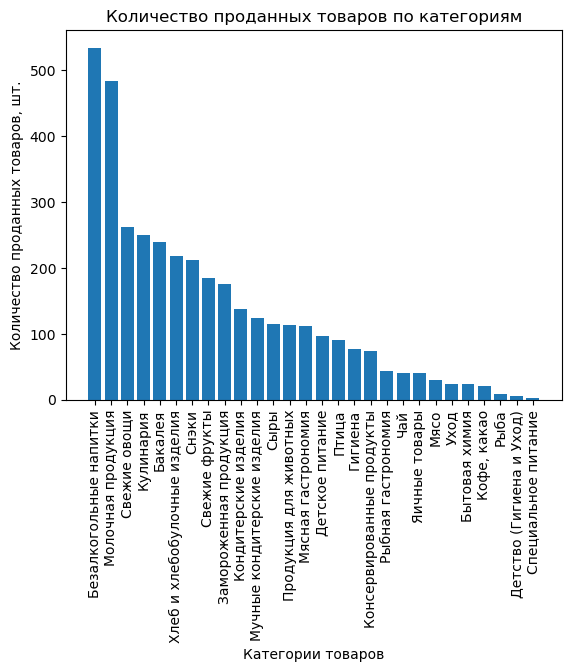

In [11]:
plt.bar(df1['level1'], df1['quantity'])
plt.title('Количество проданных товаров по категориям')
plt.xlabel('Категории товаров')
plt.ylabel('Количество проданных товаров, шт.')
plt.xticks(rotation = 90);

**2. Оцените распределение количества проданных позиций в каждой товарной категории (level1) по подкатегориям (level2). Проиллюстрируйте свой результат расчетной таблицей.**

In [ ]:
df2 = df.groupby(['level1', 'level2']).agg({'quantity': sum}).reset_index().sort_values(by = ['level1', 'quantity'], ascending = (True, False))
df2.head(100)

,level1,level2,quantity
10,Бакалея,Сухие блюда быстрого приготовления,38
3,Бакалея,"Крупы, бобовые",30
1,Бакалея,Зерновые для завтраков,24
4,Бакалея,Макаронные изделия,24
9,Бакалея,Соусы,24
...,...,...,...
95,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,218
98,Чай,Черный чай,26
96,Чай,Зеленый чай,7
97,Чай,Чайные напитки,7


**3. Какой средний чек был 13.01.2022?**  
Ответ: 798

In [12]:
# здесь считаем по таблице orders
orders['accepted_at'] = orders['accepted_at'].dt.strftime('%Y-%m-%d')
df3 = orders[orders['accepted_at'] == '2022-01-13']
df3 = df3.groupby(['order_id']).agg({'price': sum}).reset_index()
df3['price'].mean()

798.0422794117648

**4. Доля промо в заданной категории**  
Когда товар продается по промо-акции, его базовая цена не совпадает с фактической ценой. Необходимо посчитать, какую долю от общих продаж категории "Сыры" занимают промо (в штуках). Построить пайчарт, который это проиллюстрирует.  
Ответ: 30,7%

In [13]:
# считаем долю промо сыров
df4 = df[df['level1'] == 'Сыры']
df4_promo = df4[df4['price'] < df4['regular_price']]
cheese_al = df4['quantity'].sum()
cheese_promo = df4_promo['quantity'].sum()
res = cheese_promo / cheese_al
res

0.30701754385964913

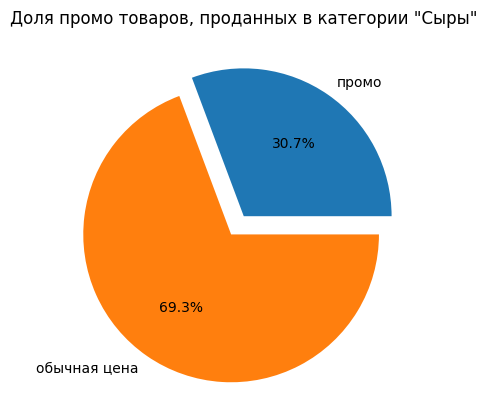

In [ ]:
# делаем мини-датафрейм для построения круговой диаграммы
cheese_not_promo = cheese_al - cheese_promo
df4_pie = [cheese_promo, cheese_not_promo]
labels = ['промо', 'обычная цена']
plt.pie(df4_pie, labels = labels, explode = [0,0.15], autopct = '%1.1f%%')
plt.title('Доля промо товаров, проданных в категории "Сыры"');

**5. Посчитать маржу по категориям в рублях и в % и отобразить с помощью 2 барчартов**

In [14]:
# считаем маржу - разницу между выручкой и закупочной ценой в данном случае
df['profit'] = (df['price'] - df['cost_price']) * df['quantity']
df5 = df.groupby(['level1']).agg({'profit': sum}).sort_values(by = ['profit'], ascending = False).reset_index()
sum_profit = df5['profit'].sum()
df5['percent'] = round(df5['profit']/sum_profit * 100, 1)
df5.columns = ['Категории товаров', 'Маржа, руб.', 'Маржа, %']
df5.head()

,Категории товаров,"Маржа, руб.","Маржа, %"
0,Безалкогольные напитки,20373,12.1
1,Кулинария,18452,11.0
2,Замороженная продукция,13099,7.8
3,Молочная продукция,12493,7.4
4,Мясная гастрономия,10230,6.1


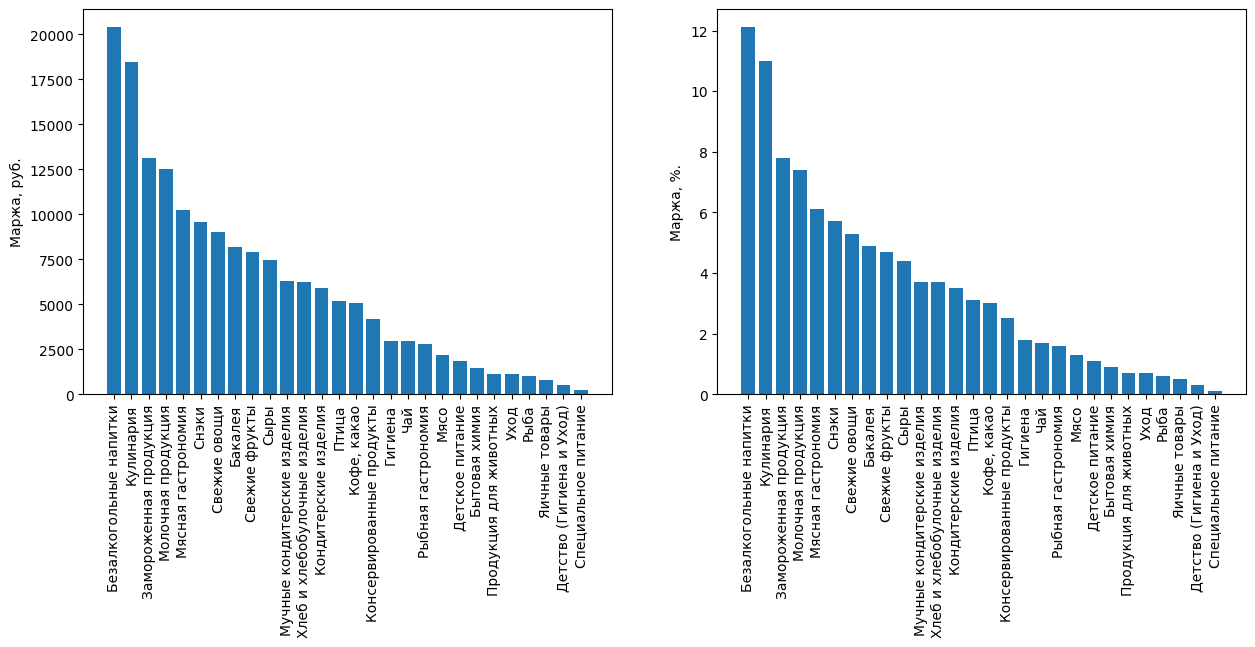

In [ ]:
# строим графики
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].bar(df5['Категории товаров'], df5['Маржа, руб.'])
ax[0].set_ylabel('Маржа, руб.')
ax[0].tick_params(axis = 'x', rotation = 90)

ax[1].bar(df5['Категории товаров'], df5['Маржа, %'])
ax[1].set_ylabel('Маржа, %.')
ax[1].tick_params(axis = 'x', rotation = 90);

**6. ABC анализ по количеству и по сумме продаж**

Анализ будет проводится по подкатегориям товаров (level2) по схеме:   
- группа А - 80% продаж;  
- группа В - 15% продаж;  
- группа С - 5% продаж.

In [15]:
# ABC анализ по количеству проданных позиций
df6_quantity = df.groupby(['level2']).agg({'quantity': sum}).reset_index()
sum_quantity = df6_quantity['quantity'].sum()
df6_quantity['quantity_percent'] = df6_quantity['quantity'] / sum_quantity * 100
df6_quantity.sort_values(by = ['quantity_percent'], ascending = False, inplace = True)
df6_quantity['cumsum_quantity_percent'] = df6_quantity['quantity_percent'].cumsum()
df6_quantity['group_by_quantity'] = df6_quantity['cumsum_quantity_percent'].apply(lambda x: 'A' if x <= 80 else ('B' if x <= 95 else 'C'))
df6_quantity.head()

,level2,quantity,quantity_percent,cumsum_quantity_percent,group_by_quantity
51,Напитки,252,6.752412,6.752412,A
10,Готовые блюда,248,6.645230,13.397642,A
92,Хлеб и хлебобулочные изделия,218,5.841372,19.239014,A
72,Снэки соленые,180,4.823151,24.062165,A
6,Воды питьевые,162,4.340836,28.403001,A


In [17]:
# ABC анализ по сумме продаж
df6_price = df.groupby(['level2']).agg({'price': sum}).reset_index()
sum_price = df6_price['price'].sum()
df6_price['price_percent'] = df6_price['price'] / sum_price * 100
df6_price.sort_values(by = ['price_percent'], ascending = False, inplace = True)
df6_price['cumsum_price_percent'] = df6_price['price_percent'].cumsum()
df6_price['group_by_price'] = df6_price['cumsum_price_percent'].apply(lambda x: 'A' if x <= 80 else ('B' if x <= 95 else 'C'))
df6_price.head()

,level2,price,price_percent,cumsum_price_percent,group_by_price
10,Готовые блюда,36944,9.509983,9.509983,A
50,Мясо птицы охлажденное,19402,4.994388,14.504371,A
51,Напитки,18320,4.715864,19.220235,A
85,"Тепличные овощи, грибы",17782,4.577374,23.797609,A
94,"Цитрусовые, семечковые и прочие плоды",16038,4.128440,27.926049,A


In [18]:
# ABC по количеству и по сумме
df6 = pd.merge(df6_quantity, df6_price, on = 'level2')
df6 = df6[['level2', 'group_by_quantity', 'group_by_price']]
df6['quantity_price_group'] = df6['group_by_quantity'] + df6['group_by_price']
df6.columns = ['Подкатегория товаров', 'ABC по количеству продаж', 'ABC по сумме продаж', 'ABC по количеству и сумме']
df6.head()

,Подкатегория товаров,ABC по количеству продаж,ABC по сумме продаж,ABC по количеству и сумме
0,Напитки,A,A,AA
1,Готовые блюда,A,A,AA
2,Хлеб и хлебобулочные изделия,A,A,AA
3,Снэки соленые,A,A,AA
4,Воды питьевые,A,A,AA
